# Machine learning on the iris dataset

In 1936 Sir Ronald Fisher wrote a paper about the iris dataset, specifically about a technique called `linear discriminant analysis` which could be used to accurately distinguish the 3 species of iris using only the `sepal` and `petal` measurements. (i.e sepal length, sepal width, petal length and petal width). In other words, Fisher framed this as a supervised learning problem, in which we are attempting to predict the species of a given iris using the four measurements. This is supervised learning because we are trying to **learn** the relationship between the 4 measurement and the outcome - which is the species of iris. If this was unlabel data, i.e if we only had the 4 measurements but not the outcome (species), then we might phrase this as unsupervised learning by attempting to cluster the samples into meaningful groups. 

The `iris` dataset has become a famous dataset from a machine learning perspective because it turns out to be an easy supervised learning task. There is a strong relationship between the measurements and the species and thus various machine learning models can accurately predict the species given the measurements. 

Goal is to predict the species of an iris using the measurements. 

What are scikit-learn's four key requirements for working with data ?

We will be using the world-famous iris dataset to learn about scikit-learn. Due to its popularity it comes bundled inside the scikit-learn module.

In [17]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In here, we are importing the `load_iris` function from the `sklearn.datasets` module. Note that the convention in scikit-learn is to import individual modules, classes or functions rather than importing scikit-learn as a whole. We then run the `load_iris` function to load the dataset.

In [18]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

This object is a special container called `Bunch` which is scikit-learn's special object type for storing datasets and their attributes. So `bunch` stores datasets and their attributes.

One of those attributes is called **data**. 

In [19]:
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

Each row represents 1 flower and the 4 columns represent the four measurements.

## Machine learning terminology

Each row is called an **observation**, some equivalent terms are sample, example, instance and record.

Each column is a **feature**, some equivalent terms are predictor, attribute, independent variable, input, regressor, covariate.

Next, lets print out an attribute of the iris object called `feature_names`

In [20]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Next, lets print out 2 more attributes of the iris object called `target` and `target_names`

In [21]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The target represents what we are going to predict, which is a 0, 1 or 2 representing setosa, versicolor or verginica respectively.

Before moving on from terminology, I would like to mention the 2 types of Supervised learning:
* **Classification**
* **Regression**

## Requirements for working with data in scikit-learn

The first step in ML is for the model to learn the relationship between the features and the response. Our first task is make sure that the features and the response are in the form that scikit-learn expects.

There are 4 key requirements to keep in mind, which are as follows:
1. Features and response are separate objects.
2. Features and response should be numeric
3. Features and response should be NumPy arrays.
4. Features and response should have specific shapes.


In our case, `iris.data` and `iris.target` fulfill this requirement, since they are stored separately. `iris.data` contains the features and `iris.target` contains the response.

Second requirement is that scikit-learn is only expecting to see numbers. That is both `iris.data` and `iris.target` be numeric types. This is exactly why `iris.target` is stored as 0, 1 and 2. *In scikit-learn the response object must always be numeric*. Regardless of it being a regression problem or a classification problem.

Third requirement is that scikit-learn expects the features and response to be stored as NumPy arrays. NumPy has a special array called ndarray which allows us to do fast computations. In our case, the `iris.data` and `iris.target` are already stored as ndarrays.

In [23]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Fourth requirement is that the feature and response objects are expected to have a certain shape. Specifically, feature objects should have 2-Dimensions in which the first-dimension (represented by rows) is the number of observations and the second-dimension (represented by columns) is the number of features. All NumPy arrays have a shape attribute so that we can verify the shape of iris.data.

In [24]:
print(iris.data.shape)

(150, 4)


The response object is expected to have single dimension and that single dimension should have the same magnitude as the first dimension of the feature object (i.e number of observations). In other words, there must be 1 response corresponding to each observation.

In [25]:
print(iris.target.shape)

(150,)


We have now verified that iris.data and iris.target conform to the 4 scikit-learn requirements for feature and response objects.

The scikit-learn convention is for the feature data to be stored in an object named X and for the response data to be stored in an object named Y. Thus, we will store iris.data in X and iris.target in Y.

In [31]:
# store feature matrix in X
X = iris.data

# store response vector in y
y = iris.target

Note that X is capitalized since it represents a matrix whereas y is lowercase since it represents a vector.

## scikit-learn 4-step modeling pattern

Now let's actually begin the machine learning process. scikit-learn provides a uniform interface for machine learning models and thus there is common pattern which can be re-used across models. The first step in this pattern is to import the relevant class. In this case we import `knearestclassifier` from `sklearn.neighbors` 

**Step 1:** Import the class you plan to use

In [26]:
from sklearn.neighbors import KNeighborsClassifier

scikit-learn is carefully organized into modules such as neighbors so that it is easy to find the class you are looking for. The second step in the pattern is to instantiate the `estimator` . Scikit-learn calls models as estimators because their primary role is to estimate unknown quantities. This process is called `instantiation` because we are creating an instance of the k-nearest classifier class. 

**Step 2:** "Instantiate" the "estimator"
* "Estimator" is scikit-learn's term for model
* "instantiate" means "make an instance of"

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

We have now created an instance of the KNeighborsClassifier class and called it `knn`. In other words we now have an object called `knn` that knows how to do K-nearest neighbor classification and **it is just waiting for us to give it some data**.

Before we move on, there are 2 important points about instantiating the estimator:
1. You can specify tuning parameters (aka "hyperparameters") during this step.
2. All parameters not specified are set to their defautls. By printing the knn object, we can see the defaults.

In [28]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


Lets move on to the 3rd step which is to fit model with data (aka "model training"). This is the model training step, in which the model *learns* the relationship between the features and the response. The underlying mathematical process through which this learning occurs varies by model.

**Step 3:** Fit the model with data (aka "model training")
* Model is learning the relationship between X and y
* Occurs in-place.

In [32]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

This operation occurs in-place, so I don't need to assign it to another object. 

The 4th and final step is to make predictions for new observations.

**Step 4:** Predict the response for a new observation
* New observations are called "out-of-sample" data
* Uses the information it learned during the model training process

In other words, I am inputing the measurements for an unknown `iris` and asking the fitted model to predict the iris species based on what it has learned in the previous step. I use the `predict` method on the knn object and pass it the features of the unknown iris as a python list. It is expecting a numpy array but it still works with a list since numpy automatically converts it to an array of the appropriate shape. For example see the output

In [33]:
knn.predict([3, 5, 4, 2])

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

Unlike the fit method, the predict method does return a value. It returns a numpy array with the predicted response values. In this case, the k-nearest neighbors algorithm using k = 1, predicts a response value of '2'. 

Scikit-learn does not know what this '2' means so we need to keep track of the encoding that 2 means verginica. And thus verginica is the predicted species for the unknown iris with measurements: [3, 5, 4, 2]

In [35]:
X_new = [[3, 4, 5, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Using a different value for K

Let's say you wanted to try a different value for K, lets say 5. This is known as model tuning in which you are varying the arguments that you pass to the model. 

In [36]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

## Using a different classification model

One thing I love about scikit-learn, is that its models have a consistent interface. Which means that I can use the same 4-step pattern on a different model with relative ease. For example, I might try logistic regression which despite its name is another model used for classification. I simply import `LogisticRegression` from the `linear_model` module. Then instantiate the model with default parameters, fit the model with data, and make predictions.

In [37]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

This time, the model predicts a 2 for the first unknown iris and a 0 for the second unknown iris. 

Now you must be wondering, which model produced the correct predictions ? The answer is that we don't know because these are out-of-sample observations meaning that we don't know the true response values. As we talked earlier, our goal in supervised learning is to build models that generalize on new data. However, we often aren't able to truly measure how well our models will perform on out-of-sample data. Does that mean that we are forced to guess how well our models are likely to do ? Thankfully no. In the next section, we begin to evaluate the model evaluation procedures which allow us to estimate how well our models are likely to perform on out-of-sample data using our existing labelled data. These procedures will help us to choose which value of K is best for KNN and whether to choose KNN or logistic regression is a better choice for our particular task. 

## How do I choose which model to use for my supervised learning task ?

Our classification task was to predict the species of an unknown iris. We tried using three classification models:
* KNN (K=1)
* KNN (K=5)
* Logistic Regression

We recieved 3 different sets of predictions. Because this is out-of-sample data, we don't know the true response values and thus we can't actually say which model made the best predictions. However, we still need to choose between these 3 models. The goal of supervised learning is to build a model that generalizes to out-of-sample data, that is, what we really need is a procedure that allows us to estimate how well a given model is likely to perform on out-of-sample data. This is known as a model evaluation procedure. If we can estimate the likely performance of our 3 models,  then we can use that performance estimate to **choose** between the models.

The first procedure is widely known but it does not have an official name. 

### Evaluation Procedure #1: Train and test on the entire dataset

The idea is simple we train our model on the entire dataset, and we test our model by checking how well it performs on that same data. This appears to solve our original problem - which was that we made some predictions but we couldn't check whether those predictions were correct. By testing our model, on a dataset for which we do actually know the response values we can check how well our model is doing by comparing the predicted response values with the true response values.

The iris dataset is already loaded and we have our `feature` matrix in X and our `response` vector in y.

### Logistic Regression

In [38]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for observations in X
y_pred = logreg.predict(X)

# Check how many predictions were generted
len(y_pred)

150

Now we need a numerical way to evaluate how well our model performed. The most obvious choice would be `Classification Accuracy` which is the proportion of correct predictions. This is known as our evaluation metric.

#### Compute the classification accuracy:

I can think of 3 different ways of doing this, but I am going to show you the one way I recommend which is to use the `metrics` module of scikit-learn. 
* First we import the metrics module
* Second we invoke the `accuracy_score` **function**

In [40]:
# compute the classification accuracy for our logistic regression model
from sklearn import metrics
metrics.accuracy_score(y, y_pred)

0.95999999999999996

That means, it compared the 150 true responses with the corresponding 150 predicted responses and calculated that 96% of our predictions were correct. This is known as our training accuracy because we are testing the model on the same data that we used to train the model.

### KNN (K=5)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


The classification accuracy is slightly better than Logistic regression.

### KNN(K=1)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


The classification accuracy is 100% it performed even better than the other 2 models, and so we would conclude KNN with K=1 is the best model to use with this data. OR NOT! Think about that for a second. 

### Evaluation procedure #2: Train/test split

In [43]:
## print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


To split the data into training and testing sets, we are going to use scikit-learn's built-in, `train_test_split` function

In [44]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [46]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [48]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

In [50]:
# Compute the prediction accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.916666666667


We see that this model, achieved a testing accuracy of 0.92

## Cross-validation example: parameter tuning

Let's now go through an example where cross-validation can be used in scikit-learn to help us with parameter tuning.

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

In other words, we want to choose the tuning parameters for KNN which will produce a model that best generalizes the out-of-sample data. We will focus on tuning the `k` in K-NearestNeighbors which represents the number of nearest neighbors that are taken into account when making a prediction. 

Our primary **function** for cross-validation in scikit-learn will be `cross_val_score` which we will import from ` sklearn.cross_validation ` module. 

In [51]:
from sklearn.cross_validation import cross_val_score

We are going to try out a value of k=5, so we instantiate a KNeighborsClassfier model with n_neighbors = 5 and save the model as an object called knn.

In [52]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)

We will now use the `cross_val_score` function, giving this function 5 parameters:
* **first parameter**: model object - knn
* **second parameter**: X - our feature matrix, it is very important to note that we are passing the entirety of X and y to cross_val_score and *NOT* X_train or y_train. cross_val_score takes care of splitting the data into folds and thus we do not need to split the data ourselves using train_test_split function.
* **third parameter**: y - our response vector
* **fourth parameter**: cv - 10 fold cross validation. 
* **fifth parameter**: scoring='accuracy' - which means we want to use classification accuracy as the evaluation metric. There are many possible evaluation metrics so it is always better to specify which one we want to use. You can see the complete list of evaluation metrics in scikit-learns model evaluation documentation.

Let's discuss what the `cross_val_score` function actually does and what it returns. Basically, the `cross_val_score` runs the first 4 steps of k-fold cross validation. That is:
1. Split the dataset into K **equal** paritions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K-times, using a **different fold** as the testing set each time.
5. Use the **average testing accracy** as the estimate of out-of-sample accuracy.

It will split X and y into 10 equal folds, it will train the KNN model on the folds 2-thru-10, it will test the model on fold 1, and calculate the testing accuracy. Then it will train the KNN model on the fold 1 and 3-thru-10 and test the model on fold 2 and calculate the testing accuracy. It will do that 8 more times. 

When it is finished, it will return the **10 accuracy scores** as a NumPy array.

In our code, we will save that NumPy array as an object `scores`.

In [53]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


- We see that during the first iteration, the model achieved an accuracy of 100%
- In the second iteration, the model achieved an accuracy of 93.3%

As mentioned above, we will average the 10 scores and use that as our out-of-sample accuracy.

It happens that NumPy arrays have a method called `mean` . So we can simply call the mean to see the `mean accuracy score`.

In [54]:
print(scores.mean())

0.966666666667


It turns out to be about 97%. Because we used cross-validation and arrived at this result, we are more confident that it is an accurate estimate of out-of-sample accuracy than we would be if we had used train/test split.

OUR goal here is to find the optimal value of K for KNN which we set using the n_neighbors parameter. Thus we will loop through a range of reasonable values for K and for each value use 10-fold cross-validation to estimate the out-of-sample accuracy. 

In [55]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


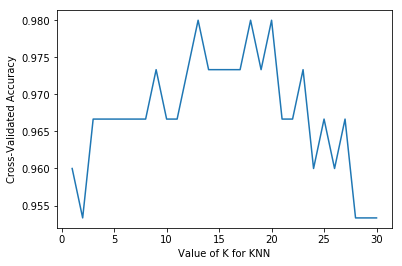

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

This is an example of the bias-variance trade-off in which low values of K procude a model with low bias and high variance and high values of K produce a model with high bias and low variance. The best model is found in the middle because it appropriately balances bias and variance **and thus it is most likely to generalize to out-of-sample data**. When deciding what exact value of K is the best, it is generally recommended to choose the value of K with the simplest model. In the case of KNN, higher values of K produce lower complexity models and thus we will chose K=20 as our single best KNN model.

So far we have used Cross-Validation to help us in parameter tuning, now lets take a look at an example of how cross-validation can be used to choose between different types of models: **KNN(k=20) vs LogisticRegression**

## Cross-validation example: model selection

**Goal**: Compare the best KNN model with logistic regression on the iris dataset

In [57]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [58]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


So, we can conclude that KNN with k=20 is a better choice than logistic regression for this particular task.

Finally, lets see how Cross-Validation can help with feature selection.

## Cross-validation example: feature selection

**Goal:**: Select whether the Newspaper feature shoul be included in the linear regression model on the advertising dataset.

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [60]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [61]:
# create a python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the sales column as the response (y)
y = data.sales

In [62]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [63]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [64]:
# fix the sign of MSE
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [65]:
# convert MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.69135317081


In [66]:
# 10-fold cross validation with two features (excluding newspapers)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191


Since RMSE is less than the model with newspaper and since our goal is to minimize the RMSE, we would conclude that removing the Newspaper from the model yields more accurate predictions.

## Review of parameter tuning using `cross_val_score`

**Goal**: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

A few sections above we saw how we can use the `cross_val_score` function to find the best tuning parameters for KNN. There we had to write our own code and draw a plot of **Cross-validated accuracy** vs **Value of K for KNN** and then visually access which K value is the best. This is something we do often and it appears that there could be an easier way to do this. And yes, there is **GridSearchCV** which was created for that purpose.

## More efficient parameter tuning using `GridSearchCV`

**GridSearchCV** allows you to define a set of parameters that you want to try with a given model and it will automatically run cross-validation using each of those parameters keeping track of the resulting scores. Essentially it replaces the `for loop` above as well as providing some additional functionality. 

To get started with GridSearchCV we first import the class from `sklearn.grid_search`

In [67]:
from sklearn.grid_search import GridSearchCV

Exactly like above, we create a python list called `k_range` that specifies the k-values that we would like to search. 

In [70]:
k_range = range(1, 31)
print(list(k_range))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Next, we create what is known as a `parameter grid`. It is simply a python dictionary, in which the key is the parameter name, and the value is a list of values that should be searched for that parameter.

In [72]:
# create a parameter grid: map the parameter names to the values that should be searched.
param_grid = dict(n_neighbors=list(k_range))
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


As you can see, this dictionary has a single key-value pair, in which the key is the string `n_neighbors` and the value is a list of numbers from 1 thru 30. Next we will instantiate the grid. You will notice that it has the same parameters as `cross_val_score` except it does not have the X and y but it does include the `param_grid`

In [73]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

You can think of the `grid` object as follows: 
* it is an object ready to do a 10-fold cross-validation on a KNN model using classification accuracy as the evaluation metric. But in addition it is given this parameter grid, so that it knows that it has to repeat the 10-fold cross-validation process 30 times and each time the n_neigbhor's parameter should be given a different value from the list. Hopefully this helps you to understand why the parameter_grid is specified using key-value pairs. We can't just give the GridSearchCV a list of numbers 1 thru 30, because it won't know what to do with those numbers. Instead we need to specifiy which model parameter, in this case, n_neighbors, should take on values 1 thru 30. One final note about instantiating the grid. If you computer supports parallel processing you can set the n_jobs parameter to -1 to instruct scikit-learn to use all available processors. Finally we **fit** the grid with data, with just the X and y objects. 

In [75]:
# store feature matrix in X
X = iris.data

# store response vector in y
y = iris.target

# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

This step may take a while depending on the model and the data and the number of parameters being searched. Remember that this is running 10-fold cross-validation 30 times and thus the KNN model is being fit and predictions being made 300 times.

Now that grid search is done, let's take a look at the results which are stored in the `grid_scores_` attribute.

In [76]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

This is actually a list of 30 named tuples. The 1st tuple indicates that when the n_neighbors parameter was set to 1, the mean cross-validated accuracy was 0.96 and the standard deviation of the accuracy scores was 0.053. While the mean is usually what we pay attention, the standard deviation is something to keep in mind, because if the standard deviation is, then that means the cross-validated accuracy might not be as reliable.

Anyway, you can see that there is 1 tuple for each of the 30 trials of cross-validation.

Next, we will examine the individual tuples, just in case you need to do so in the future. I am going to slice the list to select the first tuple using the [0] notation.

In [77]:
# examine the first tuple
print(grid.grid_scores_[0])

mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1}


Because it is a named tuple, I can select its elements using the dot notation.

In [79]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


* Parameters is simply a dictionary of the parameters that were used.
* cv_validation_scores is an array of the 10 accuracy scores that were generated during 10-fold cross-validation using that parameter.
* mean_validation_score is the mean of the 10 scores.

It is easy to collect the `mean_validation_scores` accross the 30 runs and plot them like we did above.

In [80]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


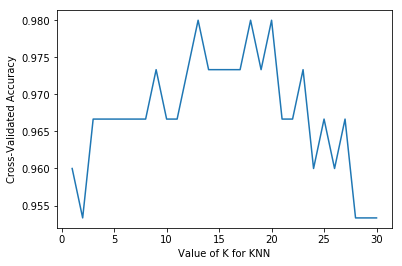

In [81]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

We see that the plot is identical to the one we generated above. 

Now you might be thinking that writing a list comprehension and then making a plot can't possibly be the most efficient way to view the results of GridSearch, you are exactly right. Once a grid is fit with data it exposes 3 attributes which are quite useful:
1. best_score_ : is the single best score achieved across all of the parameters
2. best_params_: is a dictionary of the parameters used to generate that score.
3. best_estimator_ : is the actual model object fit with those parameters which conviniently shows you all of the default parameters for that model that you did not specify.

In [82]:
# examine the model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


As you might have noticed in the plot, there are 2 more k values that produced a score of 0.98. I don't know for sure why GridSearch chose 13 as the best value but probably it picks the first occurance of the highest score.

## Searching multiple parameters simultaneously

For example, let's pretend that you are using a `DecisionTreeClassifier` which is a model we haven't yet covered in the series. Two important tuning parameters are `max_depth` and `min_samples_leaf` you can tune those parameters independently meaning that you used different values for `max_depth` while leaving `min_samples_leaf` at its default value and then you try different values for `min_samples_leaf` while leaving `max_depth` at its default value. The problem with that approach is that the best model performance can be achieved when neither of those 2 values are at their default values. Thus you need to **search** those two parameters simultaneously which is exactly what we are about to do with *GridSearchCV*

In the case of KNN, another parameter which might be worth tuning other than K is the weights parameter. This weights parameter controls how the K-nearest neighbors are weighted when making a prediction. The default option is **uniform** which means that all points in the neighborhood weighted equally but another option is **distance** which weights closer neighbors more heavily than further neighbors. Thus, I am going to create a list of those options called weight_options in addition to the 30 integer options represented by k_range

## Evaluating a classification model

In the previous section, we learned how to search for the optimal tuning parameters for a model using `scikit's` **GridSearchCV** and **RandomizedSearchCV** tools. In this video, we will be covering how to properly evaluate classification models. Here's the agenda:
* What is the purpose of **model evaluation**, and what are some common evaluation procedures ?
* What is the usage of **classification accuracy**, and what are its limitations ?
* How does a **confusion matrix** describe the performance of a classifier ?
* What **metrics** can be computed from a confusion matrix ?
* How can you adjust classifier performance by **changing the classification threshold** ?
* What is the purpose of an **ROC** curve ?
* How does **Area Under the Curve (AUC) ** differ from classification accuracy ?

### Review of model evaluation

Let's briefly review the goal of model evaluation and the evaluation procedure we have learned so far. Model evaluation answers the question ** HOW DO I CHOOSE B/W DIFFERENT MODELS ? **

Regardless of whether you are choosing between KNN or Logistic Regression or selecting the optimal tuning parameters or choosing between different sets of features, you need a **model evaluation procedure** to help you estimate how well a model will generalize to out-of-sample data. However, you also need an evaluation metric  to pair with your procedure so that you can quantify a model's performance. We have talked in-depth about different model evaluation procedures starting with:
1. **Training and testing on the same data**: is a classic cause of overfitting, in which you build an overly complex model that won't generalize to new data. And thus, it is not actually useful. 
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize.
    
2. ** Train/Test Split**:  
    - Split the dataset into two pieces, so that the model can be trained and tested on different data.
    - Better estimate of out-of-sample performance, but still a "high variance" estimate.
    - Useful due to its speed, simplicity and flexibility.
    
3. ** K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together.
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split.

## Model evaluation metrics

* **Regression Problems**: Mean Absoulte Error, Mean Squared Error, Root Mean Squared Error
* **Classification Problems**: Classification accuracy.

You always need an evaluation metric to go along with your chosen procedure and the choice of metric depends on the type of problem we are addressing. **For Regression problems** we have used **Mean Absolute Error** ; ** Mean Squared Error **; and **Root Mean Squared Error** as our evaluation metrics. **For Classification problems** all we have used so far is **Classification accuracy**. There are many other important evaluation metrics for classification and those metrics is the focus of this coming section.

Before we learn any new evaluation metrics, let's review *Classification Accuracy* and talk about it's strength's and weaknesses. I have chosen the `PIMA Indian Diabetes dataset` for this lesson, which includes the health data and diabetes status of 768 patients. We will import this dataset into a pandas dataframe and explicitly specify the column names as the data does not contain a header row.

In [1]:
# read the data into a Pandas dataframe
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Question**: Can we predict the diabetes status of a patient given their health measurements ?

Each row represents a patient. The `label` column indicates if a patient has diabetes or does not have diabetes.

We are going to start by defining the `feature` matrix **X** and `response` vector **y**. We are going to select `pregnant`, `insulin`, `bmi`, `age` as the features.

To create a pandas dataframe containing only those 4 columns, I put the names of the columns in a python list and pass that list to the PIMA dataframe using braket notation and store the result in X. To create **y**, I use the dot notation to select the pandas series named label. 

In [3]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [4]:
# split X and y into training and testing sets.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

Now that we have made predictions for the testing set, we can calculate the **Classification Accuracy** - which is simply the % of correct predictions.

> **Classification accuracy**: percentage of correct predictions

We first import the **metrics** module from sklearn. And then pass `y_test` and `y_pred_class` to the **accuracy_score** function. Because `y_test` contains the true response values for the testing set, the accuracy score can tell us what percentage of predictions in `y_pred_class` were correct.

In [7]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333


The classification accuracy is 69% which seems ehh pretty good.

### NULL Accuracy

**HOWEVER**, any time you use classification accuracy as your evaluation metric it is important to compare it with **NULL accuracy** which is the accuracy that could be achieved by always predicting the most frequest class in the testing set. Let's calculate the Null accuracy for this problem. The `y_test` object is a pandas Series object, and so it has a `value_counts` method that counts how many instances exist of each value in the Series.

In [8]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In this case, the 0 value is present 130 times, and the 1 value is present 62 times. This is known as the **Class Distribution**. Null accuracy answers the question, if my model were to predict the predominant class 100% of the time  how often would it be correct ? Let's figure out how to calculate this. Because `y_test` only contains 1's and 0's we can calculate the percentage of 1's by simply taking the mean. 

In [9]:
# calculate percentage of ones
y_test.mean()

0.3229166666666667

In this case, 32% of the values in y_test are 1's.  

In [10]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In this case, 67% of the values of y_test are 0's. Since 67% is greater than 32%, we call 67% as the *NULL ACCURACY* of the model. In other words, a dumb model that always predicts that the patient does not have diabetes will be right 68% of the time. This is obviously not a useful model but it provides a baseline against which we might want to measure our logistic regression model. When we compare our *NULL ACCURACY* of 68% with our **Model Accuracy** of 69% suddendly our model does not look very good. This demostrates one weakness of classification accuracy as a model evaluation metric in that *classification accuracy does not tell us anything of the underlying distribution of the testing set*. Before we move on, I want to show you how to calculate the NULL ACCURACY in a single line of code. 

In [11]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [13]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

Finally, I want to show you one other weakness of **Classification Accuracy**. Let's take a look at the first 25 values of the true response values as well as the corresponding 25 predictions from our logistic regression model.

In [14]:
# print the first 25 true and predicted responses
print("True: ", y_test.values[0:25])
print("Pred: ", y_pred_class[0:25])

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Do you notice any patterns ?

You might have noticed that when the true response value is 0, the model almost always predicts a 0. But when the true response value is a 1, the model rarely predicts a 1. In other words, the model is usually making certain types of errors and not others but we would never know that by just examining the accuracy. This particular issue will be addressed by the **Confusion Matrix**. To conclude this section, I will briefly review what we have learned about classification accuracy. 
* Classification accuracy is the **easiest classification metric to understand**.
* But, it does not tell us the **underlying distribution** of response values. (Checked using Null Distribution)
* And, it does not tell you what **"types" of errors** your classifier is making.

## Confusion Matrix

Confusion matrix is losely defined, as a table, which describes the performance of a classification model.

> Table that describes the performance of a classification model.

`confusion_matrix()` function is also available in the `metrics` module. And it outputs a 2x2 Numpy array

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values.
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


![Confusion Matrix](images/09_confusion_matrix_2.png)

When a confusion matrix is used for a binary problem, each of these boxes has a specific name that is useful to memorize. 

In [16]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix

The confusion matrix is useful in helping you to understand the performance of your classifier, but how can it help you between choosing models ? It is not a model evaluation metric and so you can't simply tell scikit-learn to choose the model with the best confusion matrix. However, there are many metrics which can be calculated from a confusion matrix and those can be directly used to choose between models. Let's go through a few of the popular metrics and then at the end talk about how to choose which metric to optimize. As you may have already figured out, *Classification Accuracy* can be calculated from the confusion matrix. You add the TP's with TN's and divide by the total number of observations. We can also calculate this using the *metrics.accuracy_score* function.

> **Classification Accuracy** : Overall, how often is the classifier correct ?

In [18]:
print((TP + TN)/(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


> **Classification Error**: Overall, how often is the classifier incorrect ?

Also known as `Misclassification Rate`. 

In [19]:
print((FP + FN)/(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


> **Sensitivity**: When the actual value is positive, how often is the prediction correct ?

If we take a look at the sample of True and Predicted responses, we know that the sensitivity is going to be low because in most cases, the actual value is 1 the model incorrectly predicted 0. Looking at the confusion matrix, sensitivity is calculated by dividing the TP's with the total of the bottom row or 15/62. The bottom row is all that is relevant for this calculation since we are only considering cases in which the actual response value is 1.

To me, the term Sensitivity makes intuitive sense because it is a calculation of how sensitive the classifier is to detecting positive instances. However, it is also known as *True positive rate* and *Recall*

scikit-learn has a metrics function called **recall_score** that can do this for us.

In [20]:
print(TP/(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


 > **Specificity**: When the actual value is negative, how often is the prediction correct ?

 Just like sensitivity, specificity is something you want to **Maximize** 

In [21]:
print(TN/(TN+FP))

0.907692307692


If you want to memorize the term specificity, think of it as describing how "specific" the classifier is in predicting positive instances ?  There is no metrics function which calculates the specificity for us, so we just have to calculate that from the confusion matrix.

For both `sensitivity` and `specificity` the best possible value is 1. And so you would describe our classifier as highly specific but not highly sensitive. 

> **False Positive Rate**: When the actual value is negative, how often is the prediction incorrect ?

In [22]:
print(FP/(TN+FP))

0.0923076923077


Or in other words, False Positive Rate is 1 - specificity.

> **Precision**: When a positive value is predicted, how often is the prediction correct ?

You can think of precision as how precise the classifier is when predicting a positive instance.

In [23]:
print(TP/(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


Note that many other metrics can be calculated from the Confusion matrix such as the F1 score and Matthews correlation coefficient. 

To conclude this section, I would advise you to always examine the confusion matrix for your classifier, since it gives you a more complete picture of how your classifier is performing. It also allows you to compute various classification metrics which can guide your model selection process. However, you can't optimize your model for every one of these metrics, so how do you choose between them ? The choice of metric ultimately depends on your business objective and the easiest way for me to explain this is through 2 examples. (check out the video).

## Adjusting the classification threshold

We are now going to discuss how to adjust the performance of a classifier by adjusting the classification threshold. You will see how this topic relates to the evaluation metrics. Let's first take a look at the first 10 predicted response values

In [24]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

There is a similar method for classification models called `predict_proba` which outputs predicted probabilities of class membership. What does that mean ? Let's take a look at the first 10 predicted probabilities to find out. 

In [25]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

It turns out that each row represents 1 observation and each column represents a particular class. There are 2 columns because there are 2 possible response classes 0 and 1. The column on the left shows the predicted probability that this observation is of class 0 and the column on the right shows the predicted probability that this observation is of class 1. For each row, these values add up to 1. Where do these numbers come from ? They are coming from logistic regression. Basically, the model learns a coefficient for each input feature during the model training process and those coefficients are used to calculate the *likelihood* of each class for each observation in the test set. Why might we care about these predicted probabilities ? Since this model predicts the likelihood of diabetes we might **rank** observations by predicted probability of diabetes and prioritize patient outreach accordingly. Since it makes more sense to contact someone with a 95% chance of diabetes than a 55% chance. Anyway, *it turns out that when you run the predict method for classification model it predicts the probabilities for each class and then chooses the class with highest probability as the predicted response.* For a binary problem like this one, another way of thinking about it is that there is a **0.50** *classification threshold* and class 1 is predicted only if that threshold is exceeded otherwise class 0 is predicted.

Let's now isolate the predicted probabilities for class 1, since knowing that alone enables you to calculate the predicted response for both classes. 

In [26]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [27]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

`y_pred_class` has the predicted classes whereas `y_pred_prob` has the predicted probabilities.

In [28]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

We are now going to plot a histogram of these probabilities to demonstrate how adjusting the classification threshold can impact the performance of the model. First, I want the plots to appear in the notebook and I am also overriding one of the default matplotlib settings. We will use matplotlib to plot a histogram of predicted probabilities of class 1. 

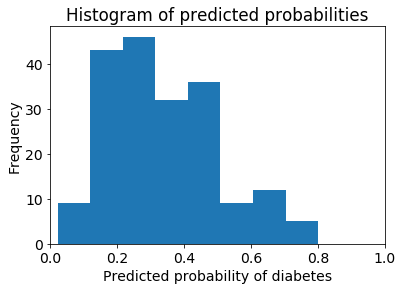

In [29]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Histogram shows you the distribution of the numerical variable. We can see by the height of this third bar, that about 45 of these observations had values between 0.2 and 0.3. Given the 0.5 classification threshold that I mentioned earlier, we can see from the histogram that class 1 is rarely predicted since only a small minority of the testing set observations, had a predicted probability above 0.5.

Think for a moment what would have happened if we were to change the classification threshold to something other than 0.5. It turns out, that you can adjust both the *sensitivity* and *specificity* of a classifier simply by adjusting the threshold. 

For example, if we decrease the threshold of predicting diabetes, to say, 0.3 we can increase the sensitivity of the classifier. That is like shifting the threshold bar to the left. Such that, all the observations with predicted probabilities above 0.3, are now predicted as class 1. This increases sensitivity because the classifier is now more sensitive to positive instances. IF this is confusing, the example of a metal detector might be helpful. It is essentially a classifier which predicts metal yes or no and a threshold is set so that large metal objects set off the detector but tiny ones do not. How would you increase the sensitivity of a metal detector ? You will simply *lower* the threshold of the amount of metal that is required to set it off and thus it is now more sensitive to metal and will predict YES more often. Anyway, let's now lower the threshold for predicting diabetes. 

> **Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier.

In [30]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

/Users/Shravan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


`binarize` function from `sklearn.preprocessing` module will return a 1 for all values above 0.3, and a 0 otherwise. The results are in a 2D numpy array, and so we slice out just the first dimension using the bracket notation and save the results in the y_pred_class object. Let's print the first 10 predicted probabilities and compare it with the 10 predicted classes with the lower threshold.

In [31]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [32]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [34]:
# print the previous confusion matrix
print(confusion)

[[118  12]
 [ 47  15]]


In [35]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [36]:
# sensitivity has increased (used to be 0.24)
print(46/(46 + 16))

0.7419354838709677


In [37]:
# specificity has decreased (used to be 0.91)
print(80/(80 + 50))

0.6153846153846154


### Conclusion

* **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions.
* Threshold can be **adjusted** to increase sensitivity or specificity.
* Sensitivity and Specificity have an **inverse** relationship

## ROC Curves and Area Under the Curve (AUC)

**Question**: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold ?

** Answer **: Plot the ROC curve!

During the previous section, you might have been thinking that it is incredibly inefficient to search for an optimal threshold by trying different threshold values one at a time. Wouldn't it be nice then, if we could see how sensitivity and specificity are affected by various thresholds, without actually having to try each threshold. It turns out, that there is a very simple mechanism for doing this, namely by plotting the ROC curve. Let's take a look at the ROC curve. First you run the `roc_curve` function from `sklearn.metrics` module. You pass it the true values of the testing set stored in `y_test` and the **predicted probability of class 1** for each observation in `y_pred_prob` . It is critically important to remember that the first argument is true values, second argument is predicted probabilities. Secondly, it is the predicted probabilities that you need to use and not the `y_pred_class` while creating the ROC curve.

The `metrics.roc_curve()` function returns 3 objects

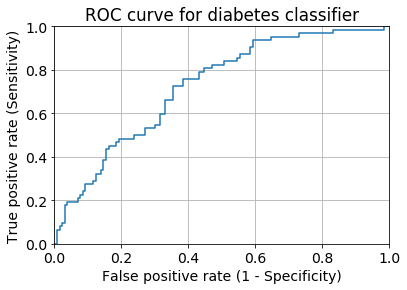

In [38]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

The ROC curve is a plot of the True Positive Rate on the y-axis against the False Positive Rate on the x-axis, for all possible classification thresholds. To use the terminology I have been focusing on, the y-axis is `Sensitivity` and the x-axis is `(1 - Specificity)` . This plot tells you for example, if you want to achieve a sensitivity of 0.9, you have to be able to accept a Specificity of around 0.4 (since it is 1-specificity on x-axis). The optimal ROC curve hugs the upper left corner of the plot, since that would represent a classifier with high-sensitivity and high-specificity. 

In summary, the ROC curve will help to visually choose a threshold, that balances sensitivity and specificity in a way that makes sense for your problem. Unfortunately, you can't actually see the thresholds used to generate the ROC curve on the curve itself. However, I have written a small helper function called `evaluate_threshold` that allows you to pass in a threshold value, and see the resulting sensitivity and specificity.  

In [39]:
# define a function that accepts a threshold and prints sensitivity and specificity.
def evaluate_threshold(threshold):
    print('Sensitivity: ', tpr[thresholds > threshold][-1])
    print('Specificity: ', 1 - fpr[thresholds > threshold][-1])

In [40]:
evaluate_threshold(0.5)

Sensitivity:  0.241935483871
Specificity:  0.907692307692


In [41]:
evaluate_threshold(0.3)

Sensitivity:  0.725806451613
Specificity:  0.615384615385


Given a particular point on the ROC curve, it would be a simple trail-and-error process, to locate the threshold that produce that point. Before we wrap up this, there is one other term, I want to introduce, which is Area Under the Curve (AUC). AUC is quite literally the area under the ROC curve, meaning the % of the box (i.e entire plot) that is located under this curve. Because an ideal classifier would hug the upper right corner of the plot, a higher AUC value, is indicative of a better overall classifier. As such, AUC is often used, as a single-number-summary of the performance of a classifier as an alternative to classification accuracy. 

AUC is the **percentage** of the ROC plot that is **underneath the curve**

We can calcuate the AUC for a model, using the roc_auc_score function from the `sklearn.metrics` module.

In [44]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


Our AUC is 0.72, while the best AUC for any classifier is 1.

It turns out that AUC can also be interpreted as follows, if you randomly chose 1 positive observation and 1 negative observation from your testing set, AUC represents the **likelihood** that your classifier would assign a higher predicted probability to the positive observation.  It makes sense that this is useful goal, because ultimately we want the classifier to rank positive observations higher than negative observations in terms of predicted probability. Finally, it is good to know that AUC is a useful evaluation metric even when there is **high class imbalance** (unlike classification accuracy).

Because AUC is a useful metric for choosing between models, it is available as a scoring function for `cross_val_score` as you can see here.

In [45]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183

In summary, we have discussed many ways to evaluate a classifier, the `confusion matrix` and `ROC` curve are tools that describe how your classifier is performing, and I would suggest you use both of them whenever possible. The main advantage of the confusion matrix is that many evaluation metrics can be calculated from it, and you can focus on the metrics that match your business objectives. As well, it extends easily to multi-class problems, in which there are more than 2 response classes. The main advantage of ROC/AUC is that they do not require you to choose a *classification threshold* unlike the *confusion matrix*, also, they are useful even when there is high class imbalance. However, they are less interpretable than confusion matrix for multi-class problems. 